In [2]:
import numpy as np
from dataloader import get_darcy_data_transformers
import matplotlib.pyplot as plt

from conditioningMaps import build_regression_problem
plt.style.use('ggplot')
from seaborn import kdeplot

In [3]:
def plot_dist_2d(data,title=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist2d(data[:,0],data[:,1],20,cmap=plt.cm.jet)
    if title is not None:
        plt.title(title)
    plt.xticks(np.arange(0,1.01,0.1))
    plt.yticks(np.arange(-4,4.1,0.5))
    plt.subplot(1,2,2)
    kdeplot(
        x=data[:,0],
        y=data[:,1],
        fill=True,
        bw_adjust=0.7
    )

In [4]:
gen = np.random.default_rng(seed = 10)

In [5]:
def bimodal_pushforward(y,v):
    return np.sign(v)*np.maximum(np.arctan(np.abs(10*y*v)),np.abs(v)) + 5*y

def get_bimodal_samples(num_target,rng):
    """
    We match the marginal on the part that we're conditioning on
    """
    cond_part = gen.uniform(0,1,(num_target,1))

    target=bimodal_pushforward(cond_part[:,0],gen.standard_normal(num_target)).reshape(num_target,1)
    return cond_part,target


In [6]:
n=2000

target = np.hstack(get_bimodal_samples(n,gen))
reference = np.hstack((target[:,:1],gen.standard_normal(size = (n,1))))

In [7]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor


reg_X,reg_y = build_regression_problem(
    reference,
    target,
    conditioning_eps = 1e-2,
    dim_shared = 1,
    solver = 'lp'
)


Building Cost Matrix
Solving OT Problem
Finished


In [12]:
model = KernelRidge(alpha=1e-2,kernel = 'rbf',gamma = 10)
model = KNeighborsRegressor(n_neighbors = 1)
trained_model = model.fit(reg_X,reg_y)

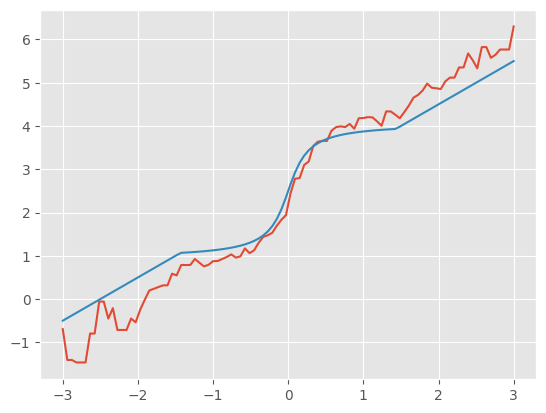

In [13]:
yvals = 0.5*np.ones(100)
grid = np.linspace(-3,3,100)
data = np.vstack([yvals,grid]).T

plt.plot(grid,model.predict(data)[:,0])
plt.plot(grid,bimodal_pushforward(yvals,grid))

In [172]:
ygrid = np.linspace(0,1,25)
v_vals = np.sort(gen.standard_normal(500))
y,v=np.meshgrid(ygrid,v_vals)
y = y.flatten()
v = v.flatten()

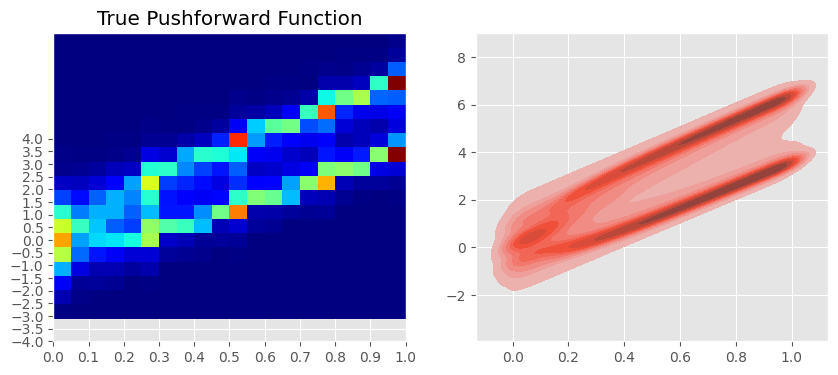

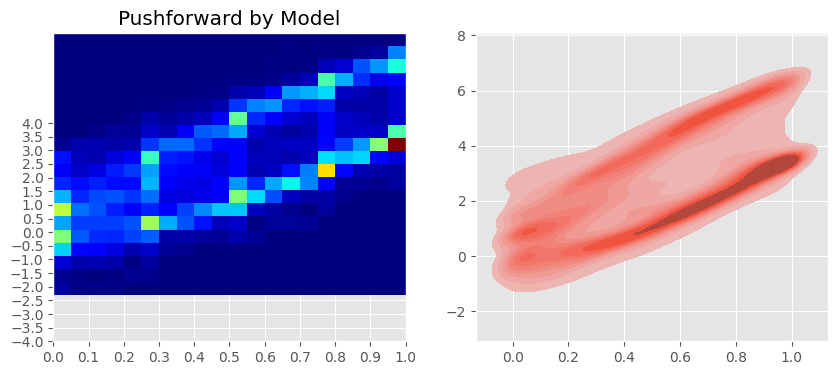

In [173]:
plot_dist_2d(np.vstack([y,
                        bimodal_pushforward(y,v)]).T,title='True Pushforward Function')

plot_dist_2d(np.vstack([y,
                        model.predict(np.vstack([y,v]).T)[:,0]
                        ]).T,title = "Pushforward by Model")